In [1]:
#SETUP

import os

import sys

def d (string):
    if string not in os.environ:
        return ""
    return os.environ[string]

os.environ["ALGO_HOME"]="/prod/algo_sdk"
os.environ["TZ"] = "UTC"
os.environ["LD_LIBRARY_PATH"] = f"{d('ALGO_HOME')}/bin:{d('LD_LIBRARY_PATH')}"
os.environ["PATH"] = f"{d('ALGO_HOME')}/bin:{d('ALGO_HOME')}/scripts:{d('HOME')}/bin:{d('PATH')}"
os.environ["PYTHONPATH"] = f"{d('ALGO_HOME')}/scripts:{d('PYTHONPATH')}"

sys.path += [f"{d('ALGO_HOME')}/scripts"]

import sim_ana

Building configurations...
Running action 'gmake'...
Generating Makefile...
Generating strat.make...
Done.
Cleaning strat
==== Building strat (release) ====
Creating ../build/obj/Release
CCSimpleMakerStrategy.cpp
CCMain.cpp
Linking strat
Running post-build commands
rsync -avz ../build/strat ../bin
sending incremental file list
strat

sent 41,650 bytes  received 35 bytes  83,370.00 bytes/sec
total size is 133,432  speedup is 3.20
len(ldf) 62
dates: 61


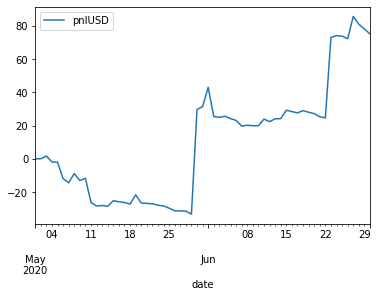

In [5]:
# COMPILE AND RUN THE CODE

!{"cd ~/build_scripts; sh rebuild.sh"}

#NO LOGGING
os.system("cd ~;gen_dates.py -sd 20200501 -ed 20200701 | parallel -j 64 ccc_sim_trader examples/maker.json")

#IF YOU WANT LOGGING, COMMENT THE ABOVE OUT AND REPLACE IT WITH THE BELOW
#!{"cd ~;gen_dates.py -sd 20200501 -ed 20200701 | parallel -j 64 ccc_sim_trader examples/maker.json"}

sim_ana.sim_ana("logs", 20200501, 20200701, None, None, False, False, [], [], True)

#The arguments to the above, in order, are the log path, start date, end date, start time, end time, business-days-only, show-details, symbols, excludes, and whether to plot.